# Use Tensorflow Keras to build a similar tinyVGG model

ResNet50?


In [53]:
import os
import pathlib
import random
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

import wfutils

In [54]:

print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [55]:
data_path = Path("../data/smalldataset")

# Setup train and testing paths
train_dir = Path(data_path, "train")
test_dir = Path(data_path, "test")
val_dir = Path(data_path, "val")

train_dir, test_dir, val_dir

(PosixPath('../data/smalldataset/train'),
 PosixPath('../data/smalldataset/test'),
 PosixPath('../data/smalldataset/val'))

In [56]:
import os

# Walk through data directory and list number of files
for dirpath, dirnames, filenames in os.walk(data_path):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in '../data/smalldataset'.
There are 66 directories and 0 images in '../data/smalldataset/test'.
There are 0 directories and 27 images in '../data/smalldataset/test/Aconitum_columbianum'.
There are 0 directories and 18 images in '../data/smalldataset/test/Heterotheca_villosa'.
There are 0 directories and 47 images in '../data/smalldataset/test/Delphinium_barbeyi'.
There are 0 directories and 50 images in '../data/smalldataset/test/Pedicularis_groenlandica'.
There are 0 directories and 31 images in '../data/smalldataset/test/Erigeron_speciosus'.
There are 0 directories and 24 images in '../data/smalldataset/test/Erythronium Grandiflorum'.
There are 0 directories and 19 images in '../data/smalldataset/test/Viola_vallicola'.
There are 0 directories and 29 images in '../data/smalldataset/test/Lupinus_argenteus'.
There are 0 directories and 53 images in '../data/smalldataset/test/Eriogonum_umbellatum'.
There are 0 directories and 39 images in '../data/sm

# Get class names

In [57]:

data_dir = pathlib.Path(train_dir) 
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['Achillea_millefolium' 'Aconitum_columbianum' 'Allium_acuminatum'
 'Allium_cernuum' 'Amelanchier_alnifolia' 'Androsace_septentrionalis'
 'Antennaria_rosea' 'Anticlea_elegans' 'Aquilegia_coerulea'
 'Caltha_leptosepala' 'Campanula_rotundifolia' 'Cardus_nutans'
 'Castilleja_linariifolia' 'Castilleja_rhexifolia'
 'Castilleja_septentrionalis' 'Chamaenerion_angustifolium'
 'Clematis_hirsutissima' 'Corydalis_caseana' 'Dasiphora_fruticosa'
 'Delphinium_barbeyi' 'Eremogone_fendleri' 'Erigeron_coulteri'
 'Erigeron_divergens' 'Erigeron_flagellaris' 'Erigeron_speciosus'
 'Eriogonum_umbellatum' 'Eriogonum_umbellatum_var_majus'
 'Erythronium Grandiflorum' 'Frasera_speciosa' 'Gentiana_parryi'
 'Geranium_richardsonii' 'Geum_triflorum' 'Heterotheca_villosa'
 'Hymenoxys_hoopesii' 'Ipomopsis_aggregata' 'Ligusticum_porteri'
 'Lupinus_argenteus' 'Mertensia_ciliata' 'Nuphar_polysepala'
 'Paxistima_myrsinites' 'Pedicularis_bracteosa' 'Pedicularis_groenlandica'
 'Pedicularis_racemosa' 'Penstemon_mensarum' 'P

In [58]:
num_classes = len(class_names)
num_classes

66

Image shape: (300, 300, 3)


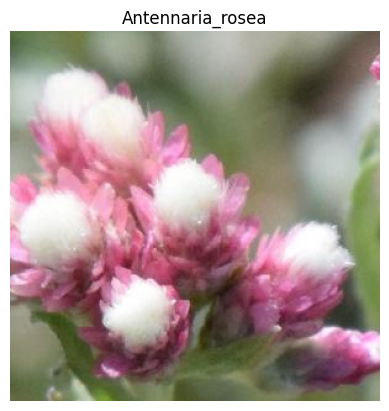

In [59]:

image = wfutils.open_random_image(target_dir=train_dir, target_class="Antennaria_rosea")


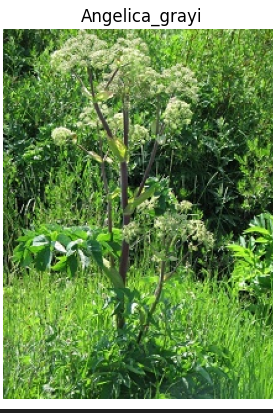

Pictures like this are bad. I can tell by its dimensions that it is one from my Google image search web scraper. I will definitely need to clean this up to get good results.

In [60]:
image.shape

(300, 300, 3)

In [61]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [62]:


# Set the random seed
random_seed = 42
tf.random.set_seed(random_seed)

# Normalize all pixel values using ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

#ImageDataGenerator can also be used for augmentation, 
# datagen = ImageDataGenerator(
#     rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
#     zoom_range=0.1,  # Randomly zoom image
#     width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#     height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#     horizontal_flip=True,  # randomly flip images horizontally
#     vertical_flip=False, # Don't randomly flip images vertically
# )  

# I did this in the Pytorch version, and I may do this later

In [63]:
# Get the data from our train and test directories

batch_size = 32

# If we use flow() we would need to fit, but I believe this works
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=batch_size,           # number of images to process at a time 
                                               target_size=(224, 224),  # convert all images to be 224 x 224
                                               class_mode="categorical",     # type of problem we're working on
                                               seed=42)

test_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size=batch_size,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)
val_data = test_datagen.flow_from_directory(val_dir,
                                               batch_size=batch_size,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

Found 5308 images belonging to 66 classes.
Found 1718 images belonging to 66 classes.
Found 1718 images belonging to 66 classes.


In [64]:
X, y = next(train_data)

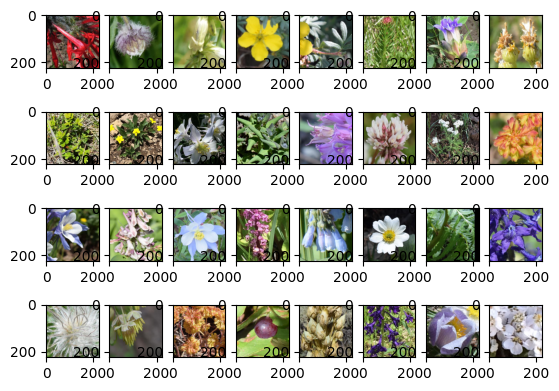

In [65]:
# view a batch
x, y = next(train_data)
fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(batch_size):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

y is one-hot encoded for categorical

In [66]:
y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [67]:
len(y[0])

66

In [68]:
len(class_names)

66

# Create the CNN

Just going to re-create tinyVGG

In [69]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization
from tensorflow.keras import Sequential

tinyVGG = Sequential([
  Conv2D(filters=25,                    # number of kernels
        kernel_size=3,                 # can also be (3, 3)
        activation="relu", 
        input_shape=(224, 224, 3)),    # first layer specifies input shape (height, width, colour channels)
  Conv2D(25, 3, activation="relu"),
  MaxPool2D(pool_size=2,                # pool_size can also be (2, 2)
            padding="valid"),           # padding can also be 'same'
  Conv2D(25, 3, activation="relu"),
  Conv2D(25, 3, activation="relu"),     # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  MaxPool2D(2),
  Flatten(),
  Dense(len(class_names), activation="softmax")        #activation output
])

In [70]:
tinyVGG.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 25)      700       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 25)      5650      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 110, 110, 25)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 25)      5650      
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 106, 25)      5650      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 53, 53, 25)        0         
 g2D)                                                 

In [71]:
tinyVGG.compile(loss=tf.keras.losses.CategoricalCrossentropy(),#"categorical_crossentropy", 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["accuracy"])

In [72]:
# Fit the model
history = tinyVGG.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=val_data,
                        validation_steps=len(val_data))

Epoch 1/5
166/166 [==============================] - 11s 54ms/step - loss: 3.7014 - accuracy: 0.0916 - val_loss: 3.2227 - val_accuracy: 0.1729
Epoch 2/5
166/166 [==============================] - 8s 46ms/step - loss: 2.6648 - accuracy: 0.3103 - val_loss: 2.5976 - val_accuracy: 0.3062
Epoch 3/5
166/166 [==============================] - 9s 54ms/step - loss: 1.8979 - accuracy: 0.5136 - val_loss: 2.4349 - val_accuracy: 0.3370
Epoch 4/5
166/166 [==============================] - 8s 51ms/step - loss: 1.2387 - accuracy: 0.6833 - val_loss: 2.4928 - val_accuracy: 0.3545
Epoch 5/5
166/166 [==============================] - 8s 48ms/step - loss: 0.6826 - accuracy: 0.8369 - val_loss: 2.6762 - val_accuracy: 0.3300


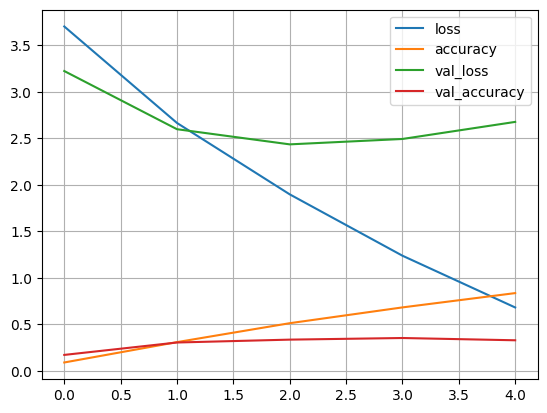

In [73]:
# A quick nice way to plot this
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.show()

Plot on seperate plots for scaling

54/54 [==============================] - 2s 39ms/step - loss: 2.6907 - accuracy: 0.3399
Test loss: 2.6907315254211426
Test accuracy: 0.33993014693260193


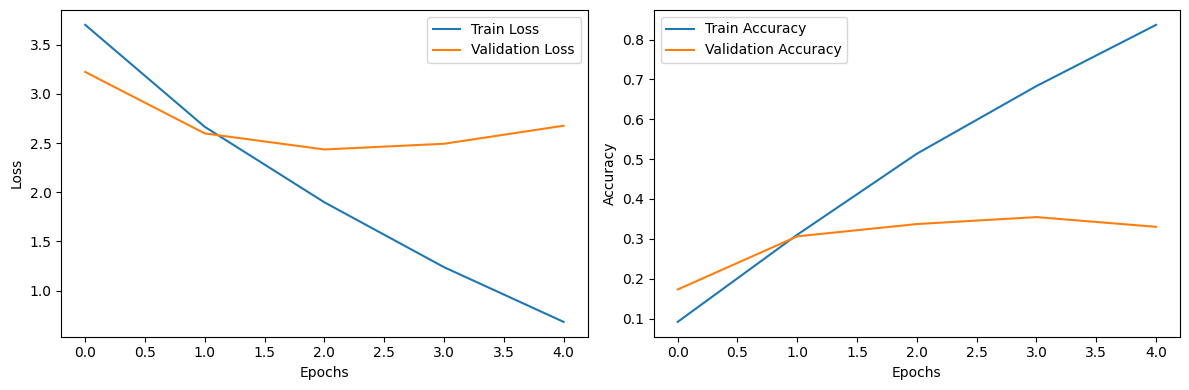

In [74]:
test_loss, test_acc = tinyVGG.evaluate(test_data)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

# Plot the training curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Predict an image class

In [80]:
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils

def predict_random_image(model : tf.keras.Sequential, target_dir, class_names):

    #print("Target Dir: ", target_dir)
    i =0
    random_folder_str = random.sample(os.listdir(target_dir), 1)[0]
    random_folder = os.path.join(target_dir, random_folder_str)
    while not os.path.isdir(random_folder): 
        # print("random folder/file", random_folder.as_posix())
        i+=1
        random_folder_str = random.sample(os.listdir(target_dir), 1)[0]
        random_folder = os.path.join(target_dir, random_folder_str)
        if i > 10 :
            break
    #print("RandomFolder", random_folder)
    # Get a random image path
    random_image = random.sample(os.listdir(random_folder), 1)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(random_folder + "/" + random_image[0])
    ##plt.imshow(img)
    plt.title(random_folder)
    plt.axis("off")

    #resize and reshape
    image = image_utils.load_img(random_folder + "/" + random_image[0], color_mode="rgb", target_size=(224,224)) 
    plt.imshow(image)   
    image = image_utils.img_to_array(image)
    print(f"Image shape: {image.shape}") # show the shape of the image
    
    image = image/255 # normalize
    image = image.reshape(1, 224, 224, 3) # reshape
    print(f"Image shape: {image.shape}") # show the shape of the image
    predictions = model.predict(image)
    #predictions = model.predict_classes(image)  #deprecated
    print("Prediction: ", class_names[np.argmax(predictions[0])])
    #print("Predictions: ", np.array(class_names)[predictions])
    return predictions

Image shape: (224, 224, 3)
Image shape: (1, 224, 224, 3)
1/1 [==============================] - 0s 39ms/step
Prediction:  Valeriana_edulis


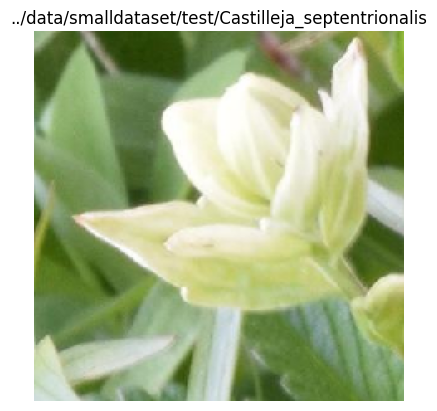

In [81]:
pred = predict_random_image(tinyVGG, test_dir, class_names)

In [82]:
pred

array([[2.3102580e-04, 1.0235804e-04, 1.1915098e-06, 1.0752360e-04,
        1.7332165e-02, 7.7544106e-03, 4.8156038e-05, 9.7431757e-02,
        6.9480361e-03, 2.2920533e-03, 1.2824056e-03, 5.0486741e-03,
        5.6518347e-04, 1.4900778e-04, 1.5728271e-01, 8.4887808e-03,
        4.0034331e-02, 1.3811697e-03, 8.8548280e-05, 1.4175094e-02,
        1.9002710e-02, 3.8896422e-04, 5.5330140e-05, 5.7704587e-05,
        3.8000825e-04, 3.3684433e-04, 1.1401734e-02, 2.4108960e-05,
        6.6325814e-03, 3.0411387e-04, 1.5260477e-03, 1.7088598e-02,
        1.8077444e-04, 1.2402060e-04, 3.1190419e-03, 1.1727156e-03,
        2.7450761e-03, 1.4679355e-05, 1.2907114e-04, 2.1273108e-02,
        6.8923697e-04, 2.2110454e-04, 2.4352411e-02, 1.6382173e-05,
        6.3565886e-04, 1.2359764e-02, 9.7743068e-06, 9.4377195e-10,
        2.9054347e-03, 8.4224641e-03, 7.7159049e-05, 1.9821678e-03,
        2.3135939e-04, 1.6906649e-02, 4.6282270e-08, 1.1728890e-03,
        5.0178001e-05, 1.0985306e-05, 9.5810555e

# Let's try with a more complex, and pretrained model

In [83]:
from tensorflow.keras.layers import GlobalAveragePooling2D

resnet50 = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
#Freeze the base model.  we will add our own final classification layers
resnet50.trainable = False 

myTransferModel =  Sequential([
    resnet50, 
    GlobalAveragePooling2D(),
    Dense(len(class_names), activation='softmax')

])

In [84]:
# Compile the model
myTransferModel.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.01),#'nadam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [85]:
myTransferModel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_3 (Dense)             (None, 66)                135234    
                                                                 
Total params: 23722946 (90.50 MB)
Trainable params: 135234 (528.26 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [86]:
# Train the model
rn_history = myTransferModel.fit(train_data,
                    epochs=50,
                    validation_data=test_data)

Epoch 1/50
166/166 [==============================] - 17s 77ms/step - loss: 4.3988 - accuracy: 0.0343 - val_loss: 4.2013 - val_accuracy: 0.0477
Epoch 2/50
166/166 [==============================] - 10s 62ms/step - loss: 4.1382 - accuracy: 0.0637 - val_loss: 4.0173 - val_accuracy: 0.0728
Epoch 3/50
166/166 [==============================] - 10s 62ms/step - loss: 3.9697 - accuracy: 0.0865 - val_loss: 3.8927 - val_accuracy: 0.0978
Epoch 4/50
166/166 [==============================] - 11s 63ms/step - loss: 3.8435 - accuracy: 0.1042 - val_loss: 3.9879 - val_accuracy: 0.0739
Epoch 5/50
166/166 [==============================] - 10s 63ms/step - loss: 3.7846 - accuracy: 0.1164 - val_loss: 3.8958 - val_accuracy: 0.1048
Epoch 6/50
166/166 [==============================] - 10s 61ms/step - loss: 3.7086 - accuracy: 0.1242 - val_loss: 3.9478 - val_accuracy: 0.1054
Epoch 7/50
166/166 [==============================] - 10s 61ms/step - loss: 3.6495 - accuracy: 0.1321 - val_loss: 3.8597 - val_accuracy:

In [88]:
val_loss, val_acc = myTransferModel.evaluate(val_data)
print("Test loss:", val_loss)
print("Test accuracy:", val_acc)

54/54 [==============================] - 3s 49ms/step - loss: 3.4792 - accuracy: 0.2043
Test loss: 3.4792263507843018
Test accuracy: 0.20430733263492584


In [89]:

def plot_loss_accuracy_curves(history):
    # Plot the training curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()



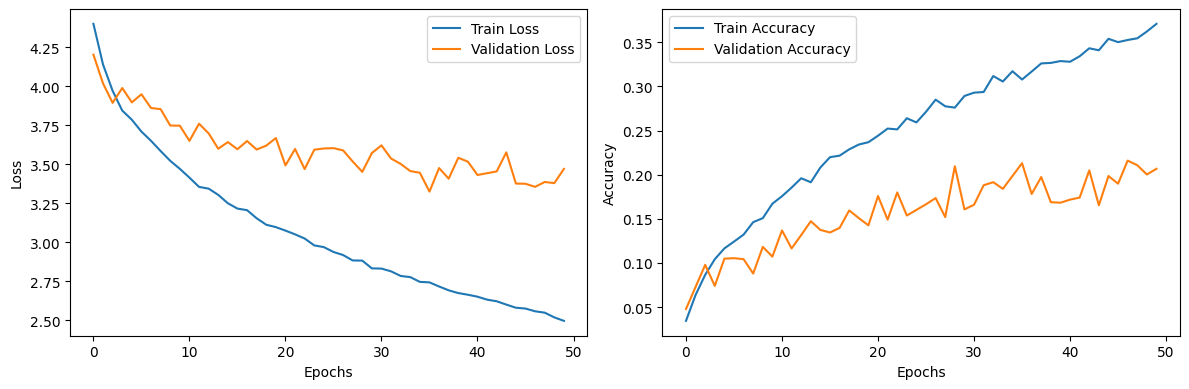

In [90]:
plot_loss_accuracy_curves(rn_history)

Attempt #1

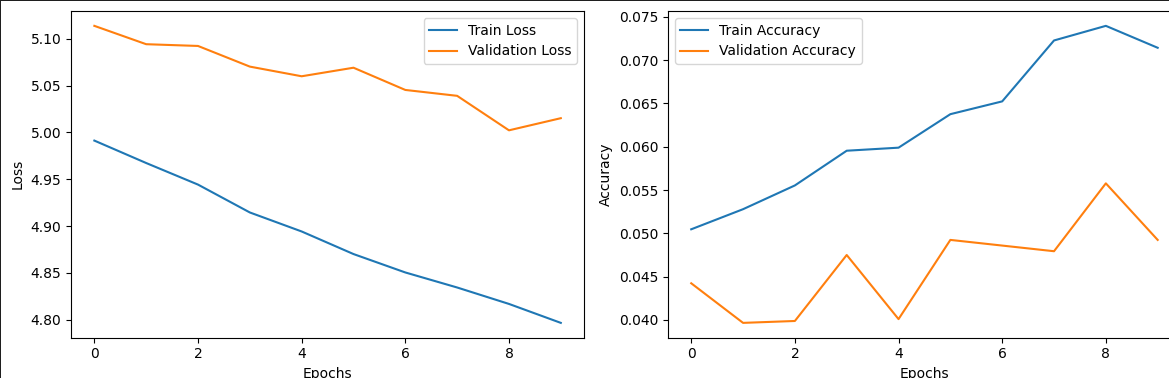

This is much better, in that the graphs are going in the right direction, but accuracy is pretty horrible.  It may just need more time, or perhaps higher learning rate.

Attempt #2 - higher learning rate from .001 to .01

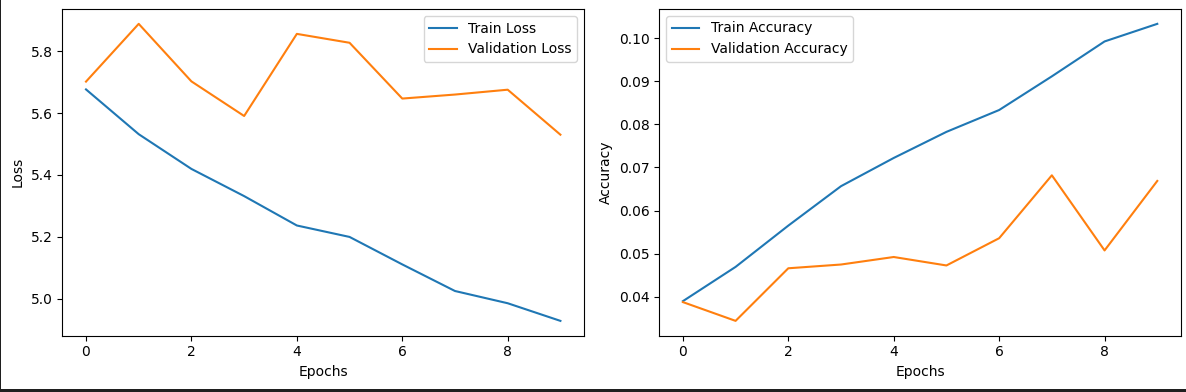

This is still going in the right direction

Attempt #3 = try lowering LR again, to 0.1

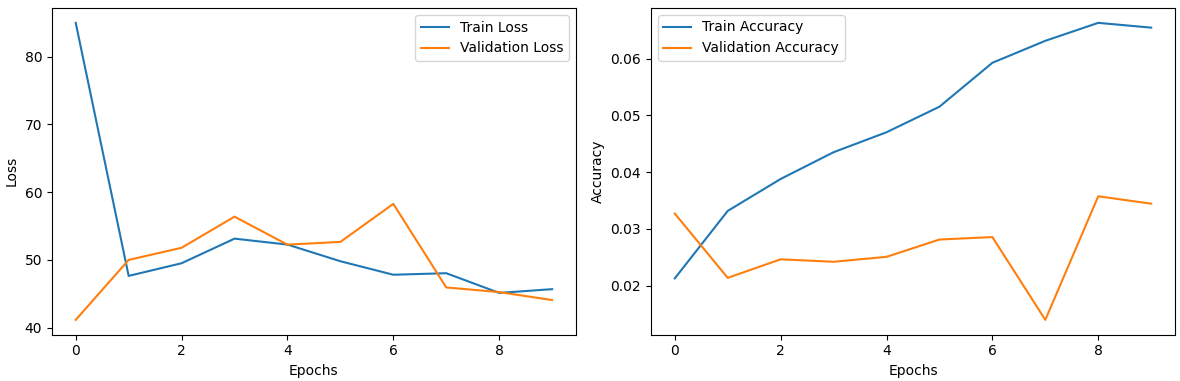

This does not appear to be going our way.  Poor accuracy, and flat curves


Attempt #4 - revert the learning rate and increase number of epochs to 25, to see if this helps.
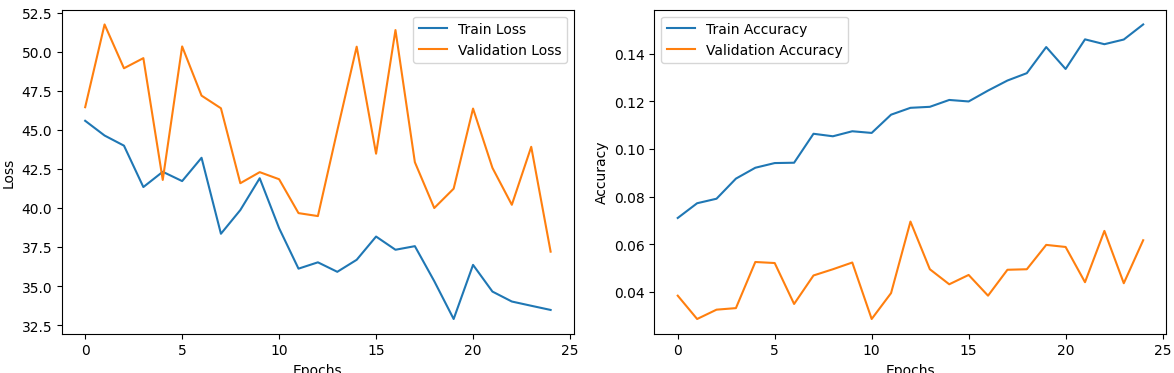

#### This model performs much worse than the previous Pytorch tinyVGG.  Our data could be the issue, since the previous model used a smaller dataset, and got pretty decent results.
The changes I made to the data for this model include adding supplemental data from the Kaggle CO Wildflowers dataset, as well as many pictures from scraping a Google Image search.  The google search results do not provide the best images.  My original dataset could be cleaned to cut out the classes that do not have many images.   The existing Kaggle CO Wildflower dataset is good too, but does not have the same set of wildflowers, specific to the Grand Mesa.

Attempt #5 Shrank the dataset to a cleaner, more balanced dataset from the GrandMesaWildflowers dataset only

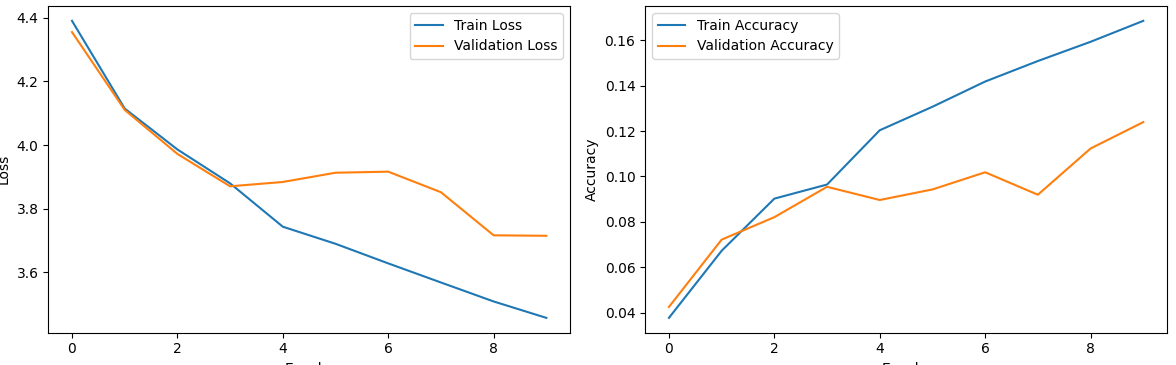

This looks much more promising!

Attempt #6 - smaller datset with more training

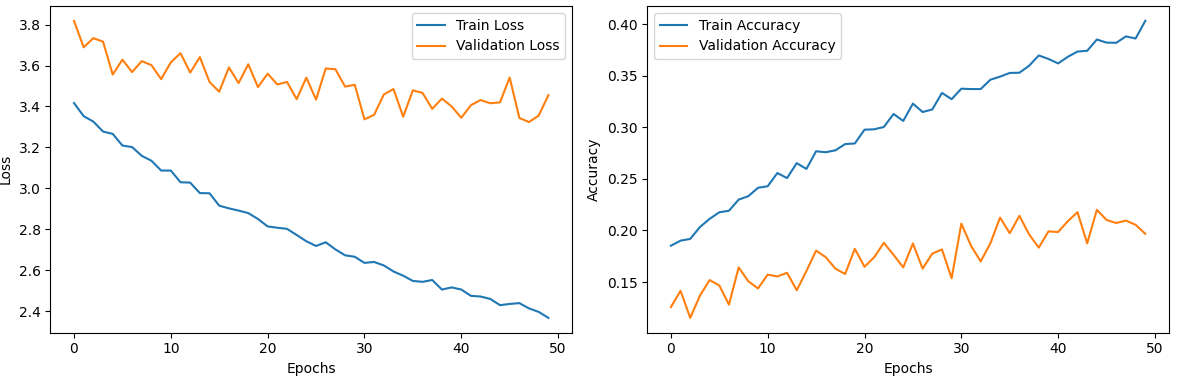


Image shape: (224, 224, 3)
Image shape: (1, 224, 224, 3)
1/1 [==============================] - 2s 2s/step
Prediction:  Castilleja_rhexifolia


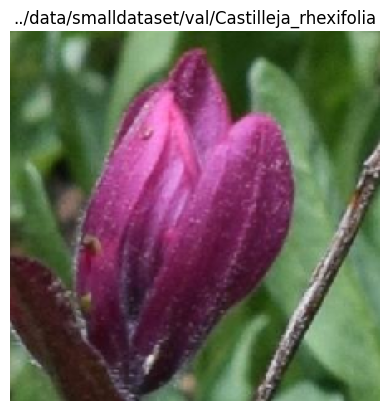

In [91]:
pred = predict_random_image(myTransferModel, val_dir, class_names)

# yet another Transfer learning model using Tensorflow hub

In [34]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

ModuleNotFoundError: No module named 'tensorflow_hub'

In [27]:
#use efficientnet
en_url = "https://www.kaggle.com/models/tensorflow/efficientnet/TensorFlow2/b0-feature-vector/1"

In [28]:

feature_extractor_layer = hub.KerasLayer(en_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=( 224, 224, 3)) # define the input image shape


en_model = tf.keras.Sequential([
    feature_extractor_layer,
    Dense(num_classes, activation='softmax')
])

In [29]:
en_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [30]:
en_history = en_model.fit(train_data,
                            epochs=5,
                            steps_per_epoch=len(train_data),
                            validation_data=test_data,
                            validation_steps=len(test_data))

Epoch 1/5
166/166 [==============================] - 19s 67ms/step - loss: 2.3990 - accuracy: 0.5100 - val_loss: 1.3703 - val_accuracy: 0.7451
Epoch 2/5
166/166 [==============================] - 10s 60ms/step - loss: 0.9846 - accuracy: 0.8271 - val_loss: 0.8682 - val_accuracy: 0.8335
Epoch 3/5
166/166 [==============================] - 10s 62ms/step - loss: 0.6288 - accuracy: 0.8932 - val_loss: 0.6754 - val_accuracy: 0.8609
Epoch 4/5
166/166 [==============================] - 10s 59ms/step - loss: 0.4578 - accuracy: 0.9252 - val_loss: 0.5649 - val_accuracy: 0.8772
Epoch 5/5
166/166 [==============================] - 10s 60ms/step - loss: 0.3542 - accuracy: 0.9471 - val_loss: 0.4955 - val_accuracy: 0.8987


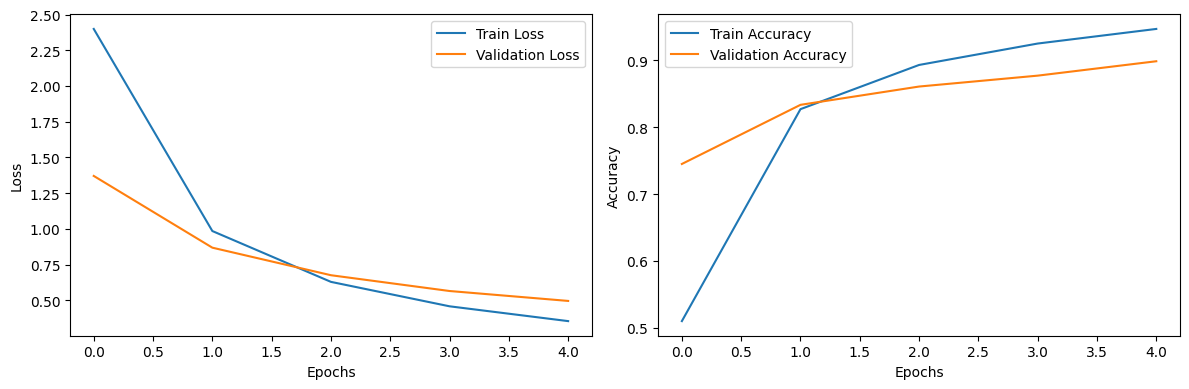

In [33]:
plot_loss_accuracy_curves(en_history)

Dang!  very nice

Image shape: (224, 224, 3)
Image shape: (1, 224, 224, 3)
1/1 [==============================] - 1s 1s/step
Prediction:  Veratrum_californicum


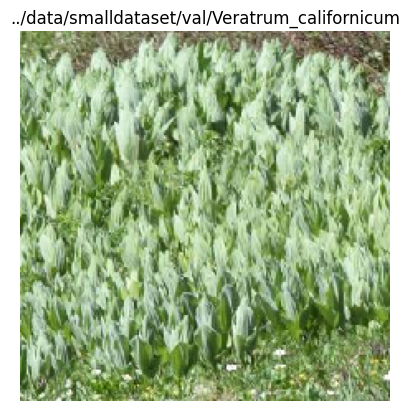

In [34]:
pred = predict_random_image(en_model, val_dir, class_names)

Image shape: (224, 224, 3)
Image shape: (1, 224, 224, 3)
1/1 [==============================] - 0s 29ms/step
Prediction:  Hymenoxys_hoopesii


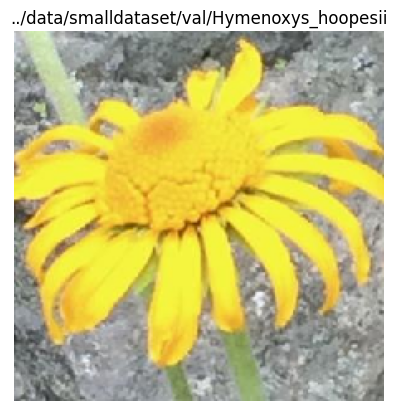

In [35]:
pred = predict_random_image(en_model, val_dir, class_names)

Image shape: (224, 224, 3)
Image shape: (1, 224, 224, 3)
1/1 [==============================] - 0s 32ms/step
Prediction:  Senecio_triangularis


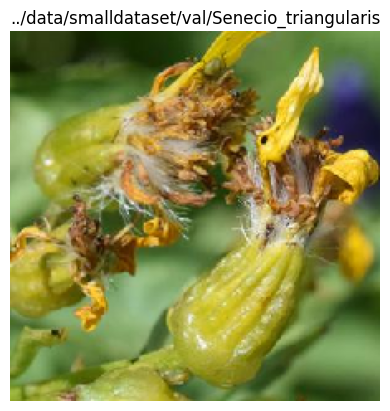

In [36]:
pred = predict_random_image(en_model, val_dir, class_names)

WOW, this worked very very well!  My simple models were terrible in comparison!

In [37]:
en_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 1280)              4049564   
 KerasLayer)                                                     
                                                                 
 dense_2 (Dense)             (None, 66)                84546     
                                                                 
Total params: 4134110 (15.77 MB)
Trainable params: 84546 (330.26 KB)
Non-trainable params: 4049564 (15.45 MB)
_________________________________________________________________


Let's finish it here.  It seems that in many cases, using existing SOTA models can at least provide a really good starting point for our day to day models.  
I really did not think that this would work as well as it did.